# Titanic - Arbol de decision 

## librerias 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Paso 1: Análisis Exploratorio de Datos (EDA)

In [97]:
# Cargar el dataset

df = pd.read_csv('Titanic-Dataset.csv')

In [98]:
# Mostrar las primeras filas del dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
# Descripción general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [100]:
# Estadísticas descriptivas
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


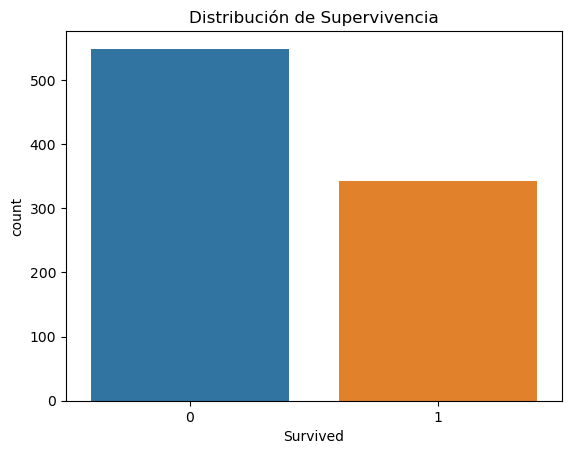

In [101]:
# Distribución de la variable objetivo (Survived)
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


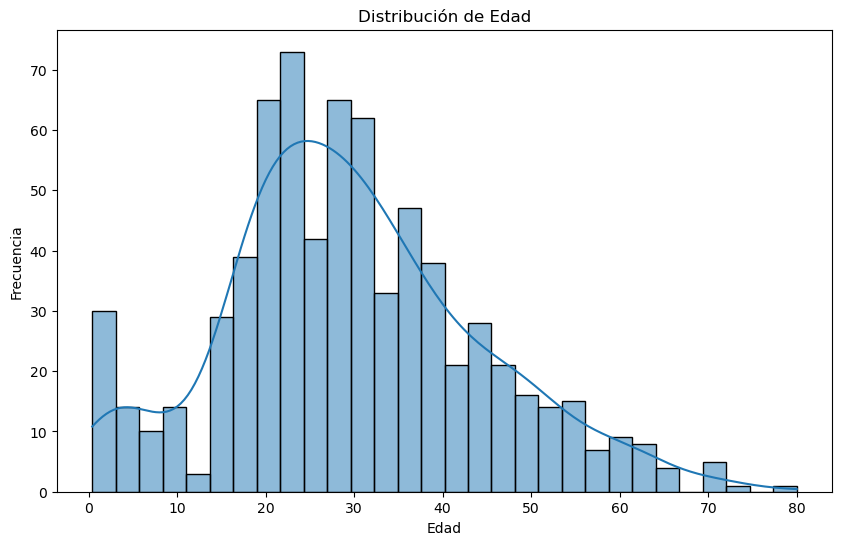

In [102]:
# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1200x800 with 0 Axes>

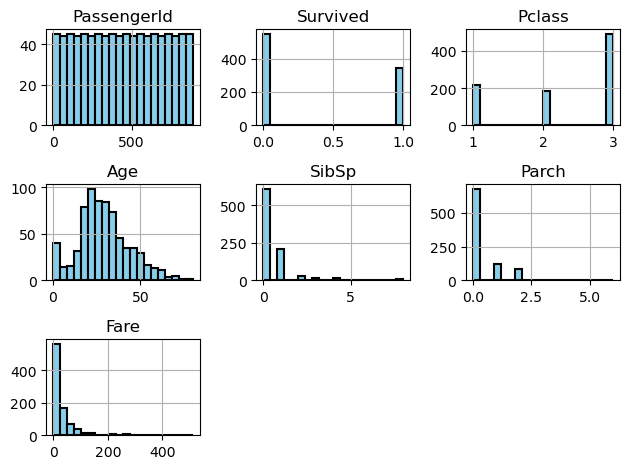

In [103]:
# Histogramas de las variables
plt.figure(figsize=(12, 8))
df.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.tight_layout()
plt.show()

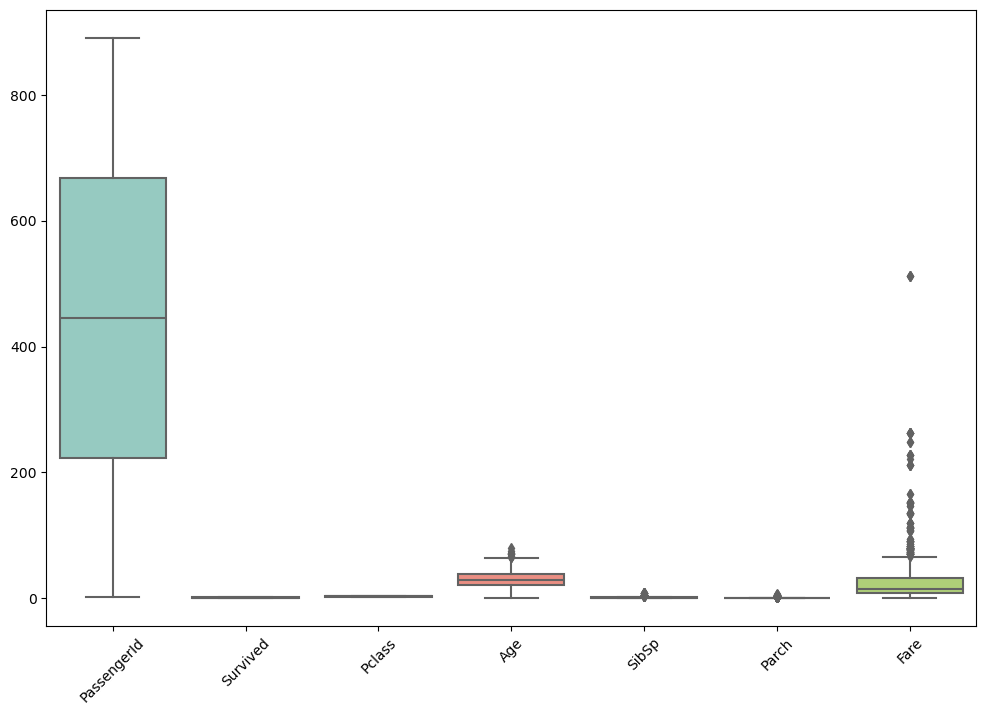

In [104]:
# Boxplots de las variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=45)
plt.show()

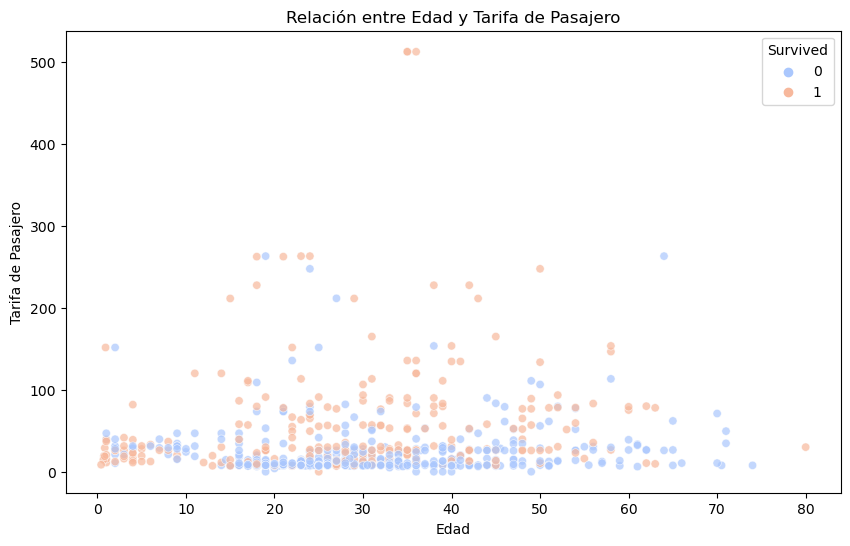

In [105]:
# Visualizar la relación entre Age y Fare, coloreando por Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="coolwarm", alpha=0.7)
plt.title('Relación entre Edad y Tarifa de Pasajero')
plt.xlabel('Edad')
plt.ylabel('Tarifa de Pasajero')
plt.show()

## Paso 2: Preprocesamiento de Datos

### Limpieza y tratamiento de valores faltantes.

In [106]:
# Verificar valores faltantes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [107]:
# Llenar valores faltantes de 'Age' con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Llenar valores faltantes de 'Embarked' con el modo
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Eliminar la columna 'Cabin' debido a muchos valores faltantes
df.drop(columns=['Cabin'], inplace=True)

# Verificar nuevamente los valores faltantes
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [108]:
# Convertir variables categóricas a numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Verificar la conversión
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


## Paso 3: Selección de Características

### Seleccionar las características más relevantes.

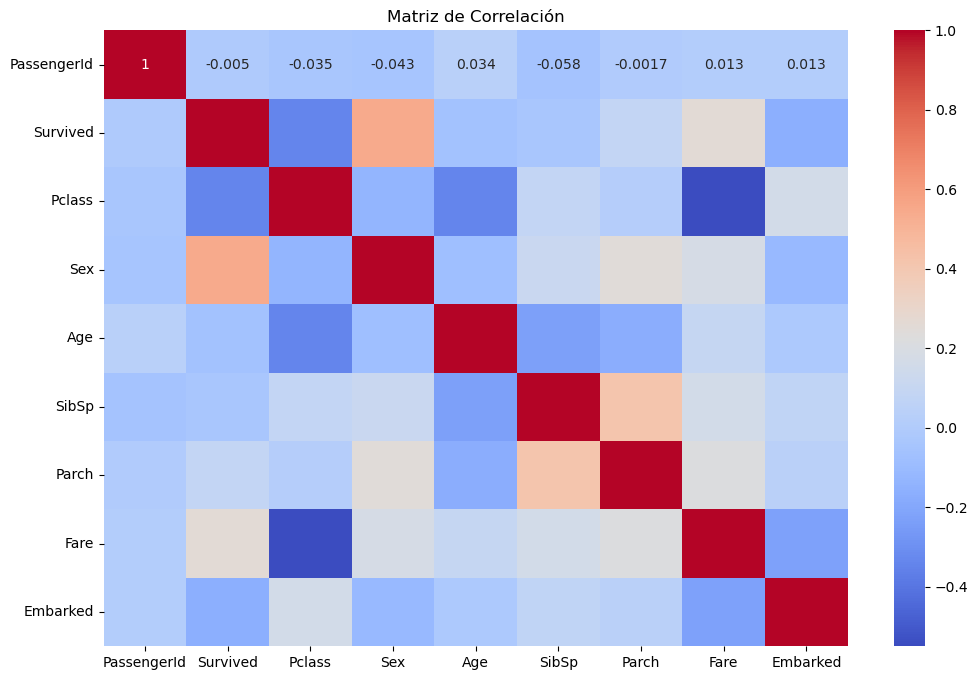

In [109]:
# Seleccionar sólo las columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


## Paso 4: Dividir el Dataset

### Dividir el dataset en conjuntos de entrenamiento y prueba.

In [110]:
# Selección de características
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]  # Definir X como las características seleccionadas
y = df['Survived']  # Definir y como la variable objetivo

# Verificar las primeras filas de X y y
print(X.head())
print(y.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [111]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


## Paso 5: Entrenar el Modelo

### Entrenar el modelo de Árbol de Decisión.

In [112]:

# Configurar los hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instanciar el modelo
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


## Paso 6: Evaluar el Desempeño del Modelo

### Evaluar el modelo en el conjunto de prueba.

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión: {accuracy}")
print(f"Precisión (Precision): {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Precisión: 0.7988826815642458
Precisión (Precision): 0.796875
Recall: 0.6891891891891891
F1-Score: 0.7391304347826088

Matriz de Confusión:
[[92 13]
 [23 51]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## Paso 7: Visualización de Resultados

### Visualizar los resultados del modelo.

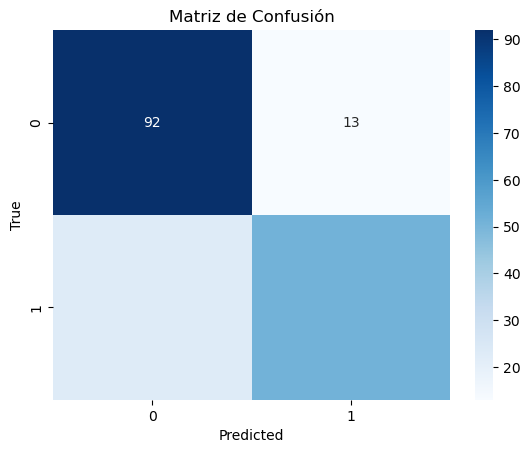

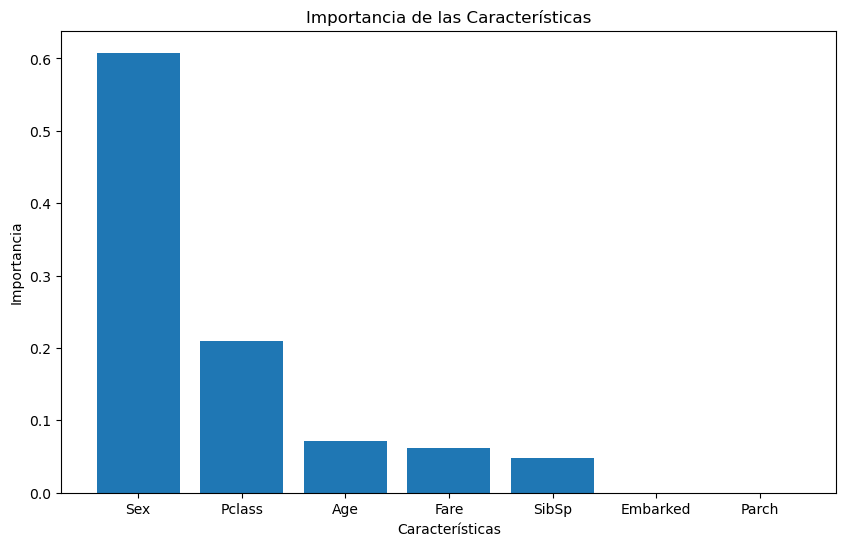

In [114]:
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Importancia de las características
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


In [115]:
# Definir las columnas predictoras (features) y la columna objetivo (target)
predictors_col = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target_col = ['Survived']

In [116]:
predictors = df[predictors_col]
target = df[target_col]

In [117]:
predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2
887,1,1,19.0,0,0,30.0000,2
888,3,1,28.0,1,2,23.4500,2
889,1,0,26.0,0,0,30.0000,0


In [118]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [119]:
corr = predictors.corr()
corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.108262
Age,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.162098,-0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


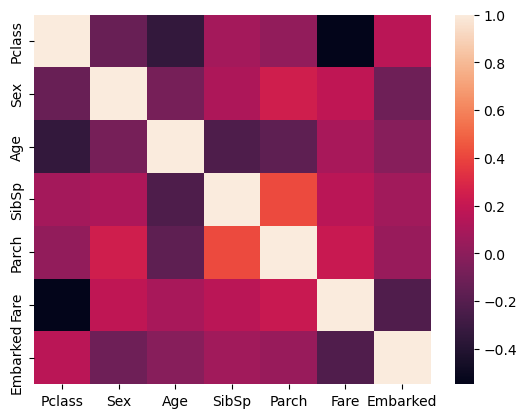

In [120]:
sns.heatmap(corr)
plt.show()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)


[Text(0.5368667260692465, 0.9736842105263158, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.20968049898167007, 0.9210526315789473, 'x[2] <= 13.0\ngini = 0.321\nsamples = 469\nvalue = [375, 94]'),
 Text(0.04073319755600815, 0.868421052631579, 'x[3] <= 2.5\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.024439918533604887, 0.8157894736842105, 'x[4] <= 0.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.016293279022403257, 0.7631578947368421, 'x[2] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008146639511201629, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.024439918533604887, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.032586558044806514, 0.7631578947368421, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.05702647657841141, 0.8157894736842105, 'x[4] <= 1.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.048879837067209775, 0.7631578947368421, 'gini = 0.0\nsamples

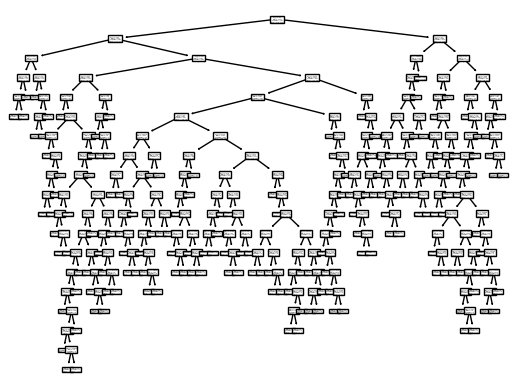

In [126]:
plot_tree(arbol)

In [127]:
predicciones = arbol.predict(X_test)


In [128]:
predicciones

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [129]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,88,22
1,18,51


In [130]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.776536312849162